 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns = Path("./Resources/whale_returns.csv")

In [3]:
# Reading whale returns
df_whalereturns = pd.read_csv(whale_returns, index_col="Date",parse_dates=True)

df_whalereturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
df_whalereturns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
df_whalereturns = df_whalereturns.dropna()
df_whalereturns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algoreturns = Path("./Resources/algo_returns.csv")
df_algoreturns = pd.read_csv(algoreturns, index_col="Date",parse_dates=True)
df_algoreturns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [7]:
# Count nulls
df_algoreturns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
df_algoreturns = df_algoreturns.dropna()
df_algoreturns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
df_algoreturns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices . Used parse date 
sp_tsx60_returns = Path("./Resources/sp_tsx_history.csv")

sp_tsx60_returns = pd.read_csv(sp_tsx60_returns, index_col = 'Date', parse_dates=True)

sp_tsx60_returns.head(10)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [11]:
# Check Data Types

sp_tsx60_returns.index = pd.to_datetime(sp_tsx60_returns.index)

sp_tsx60_returns

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [12]:
# Fix Data Types
sp_tsx60_returns['Close']=sp_tsx60_returns['Close'].str.replace('$','')

sp_tsx60_returns['Close']=sp_tsx60_returns['Close'].str.replace(',','')

sp_tsx60_returns['Close']=sp_tsx60_returns['Close'].astype('float')

sp_tsx60_returns

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
# Calculate Daily Returns
sp_tsx60_returns = sp_tsx60_returns.pct_change()

sp_tsx60_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [14]:
# Drop nulls
sp_tsx60_returns = sp_tsx60_returns.dropna()
sp_tsx60_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
#sp_tsx60_returns = sp_tsx60_returns.rename(columns={'close':'S&P TSX 60'}).copy()
sp_tsx60_returns['S&P TSX 60'] = sp_tsx60_returns['Close']
sp_tsx60_returns = sp_tsx60_returns.drop(columns=['Close'])
sp_tsx60_returns.head()

C:\Users\sobii\AppData\Local\Temp\ipykernel_8644\2040128436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_tsx60_returns['S&P TSX 60'] = sp_tsx60_returns['Close']


,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([df_whalereturns, df_algoreturns, sp_tsx60_returns], axis='columns', join='inner') 
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

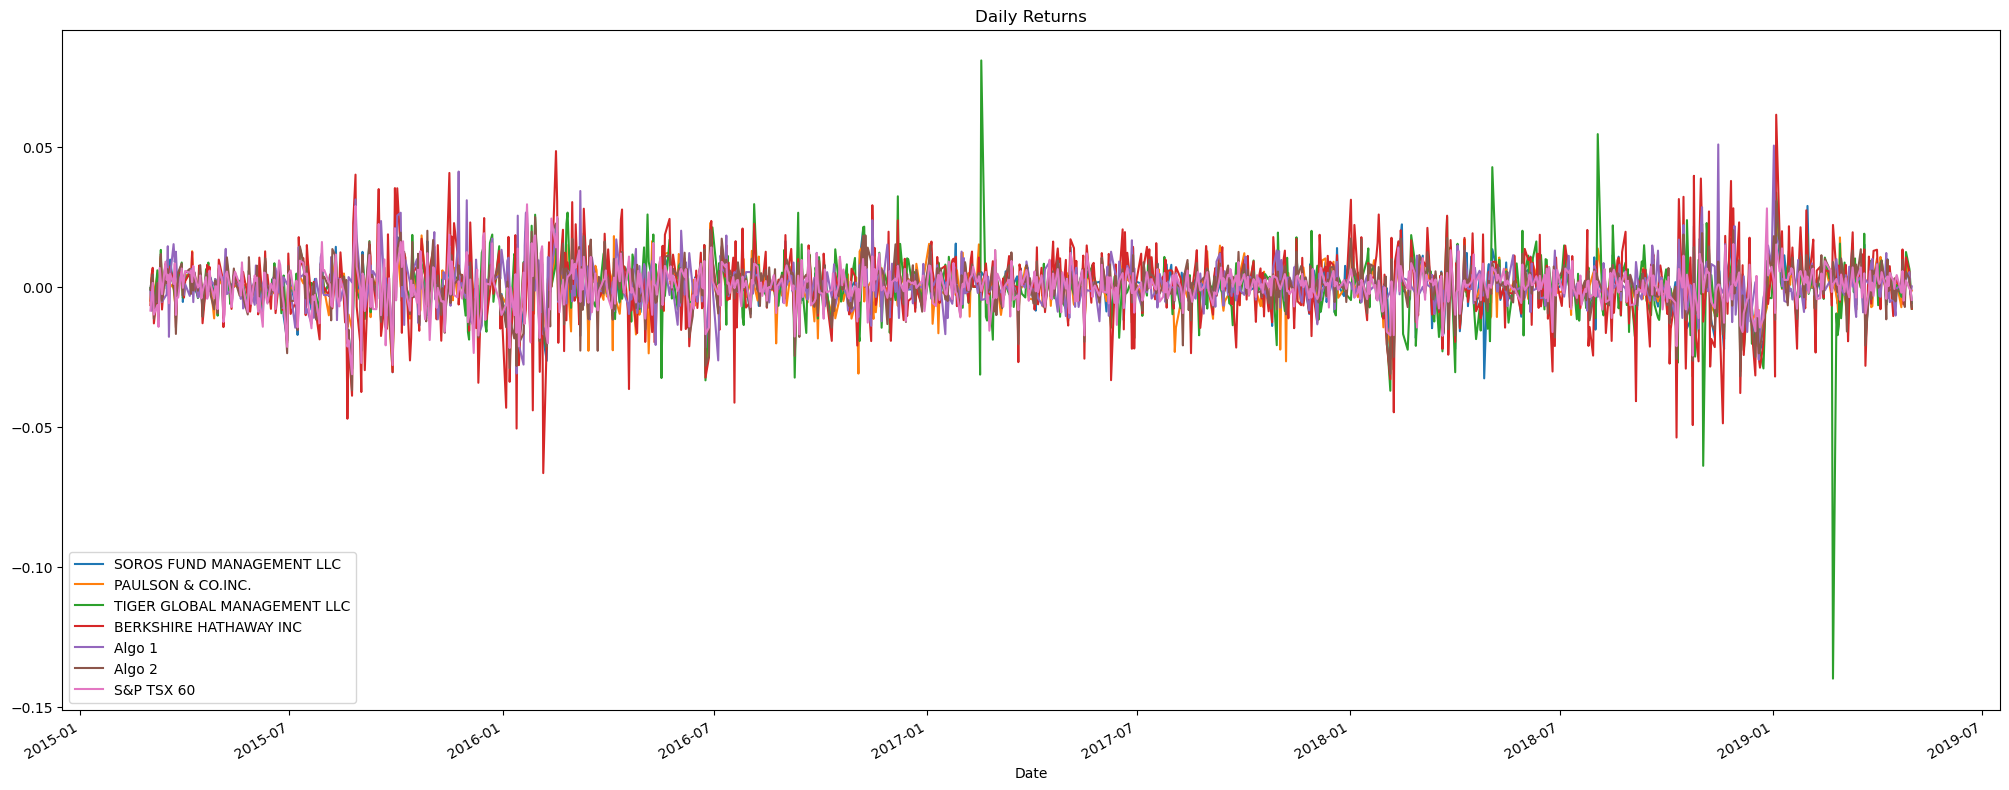

In [17]:
# Plot daily returns of all portfolios

daily_returns.plot(legend=True, figsize = (25,10), title='Daily Returns')

<Axes: title={'center': 'Cummulative Returns'}, xlabel='Date'>

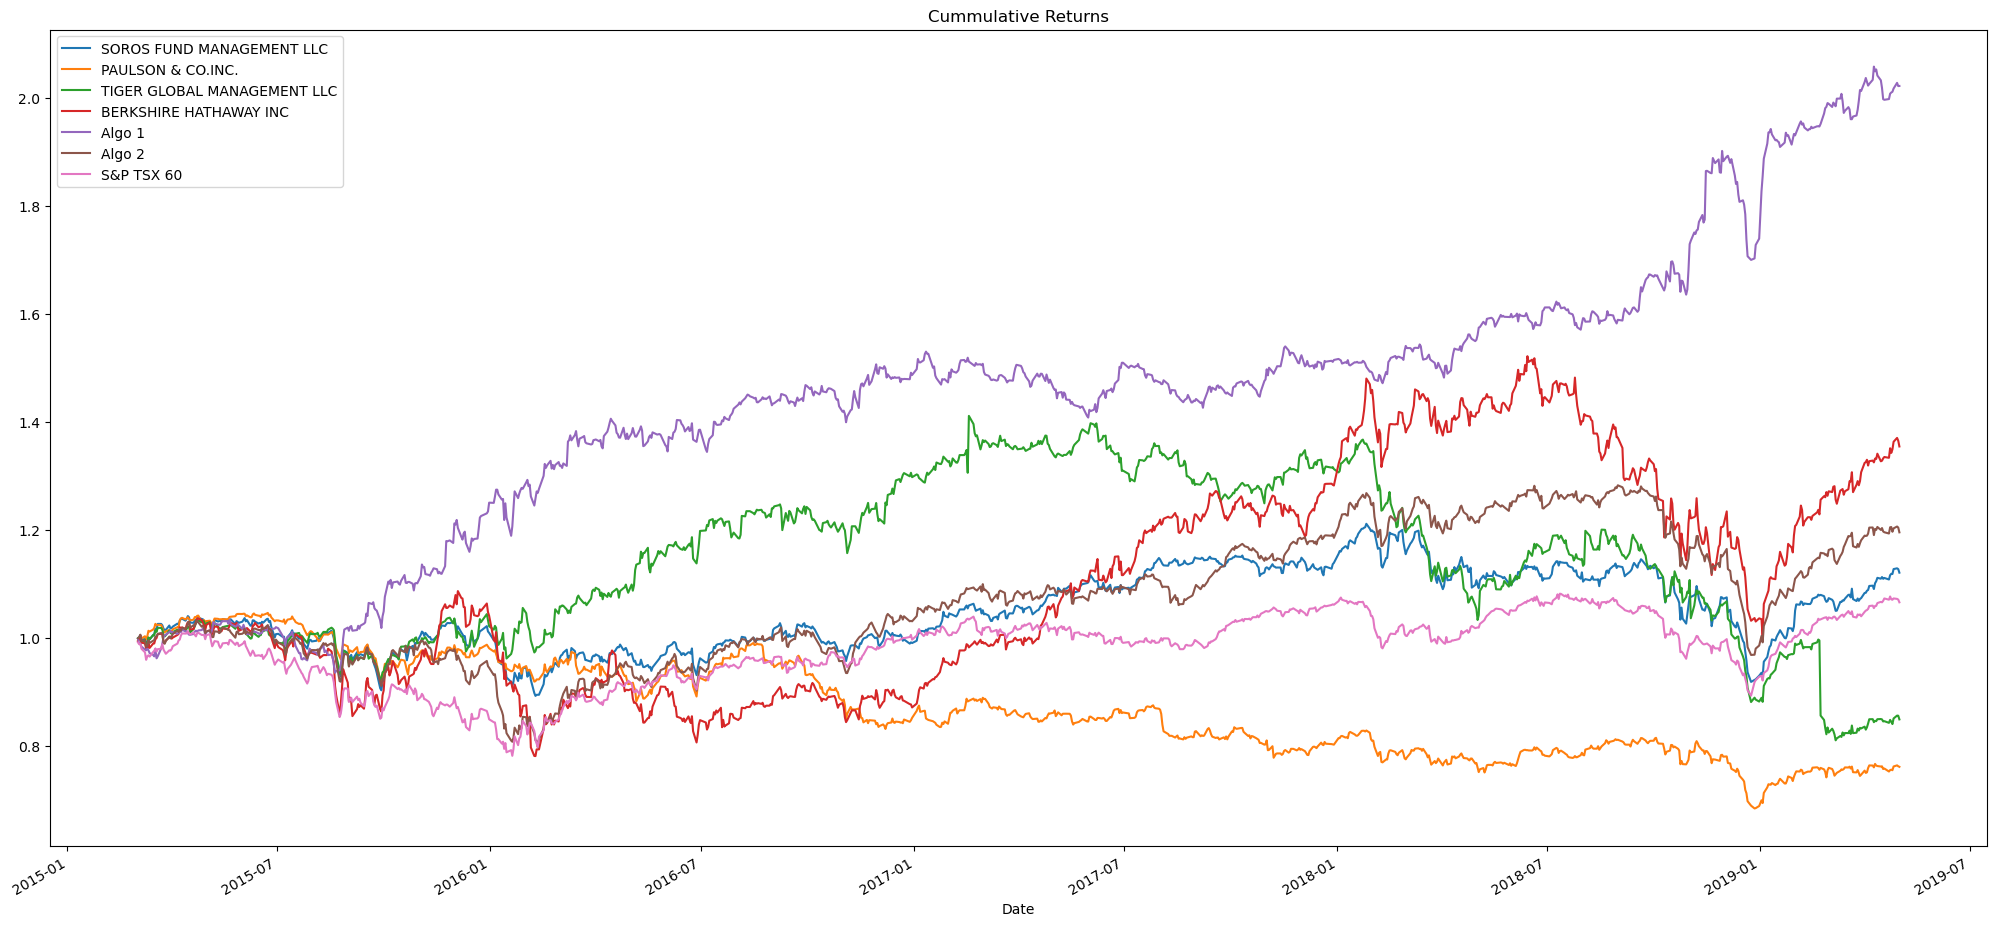

In [18]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1+daily_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(legend=True, figsize = (25,12), title='Cummulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

<Axes: title={'center': 'Daily Returns'}>

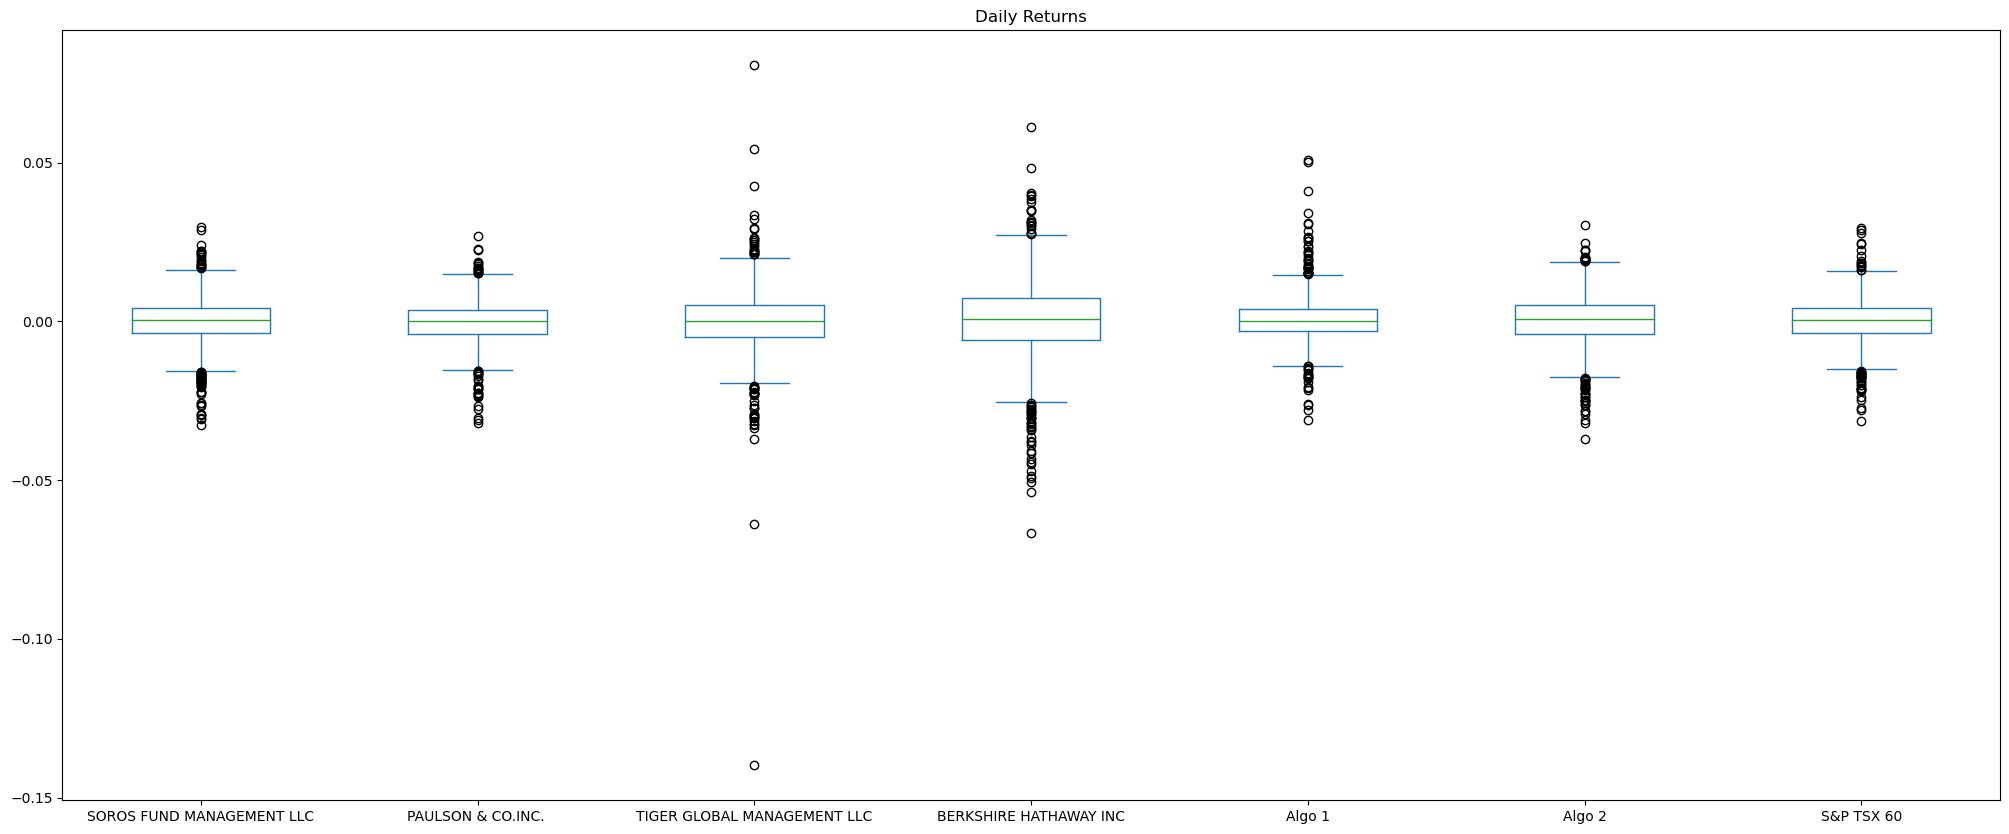

In [19]:
# Box plot to visually show risk
daily_returns.plot(kind = 'box',figsize=(25,10), title='Daily Returns')


### Create a box plot for each portfolio


### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()

daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_returns['S&P TSX 60'].std()
# Determine which portfolios are riskier than the S&P TSX 60. It is determined Paulson & Co.is risker than the S&P TSX 60
        
#riskier_portfolios
daily_returns.std() >= daily_returns['S&P TSX 60'].std()

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX 60                      True
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_returns * np.sqrt(252)

annual_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.135407
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.053506
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.021334
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.158302
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,-0.104054
...,...,...,...,...,...,...,...
2019-04-25,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.009973
2019-04-26,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.035779
2019-04-29,0.019912,0.043165,0.099226,0.082917,0.082673,0.044914,-0.012508


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21-Day rolling standard deviation'}, xlabel='Date'>

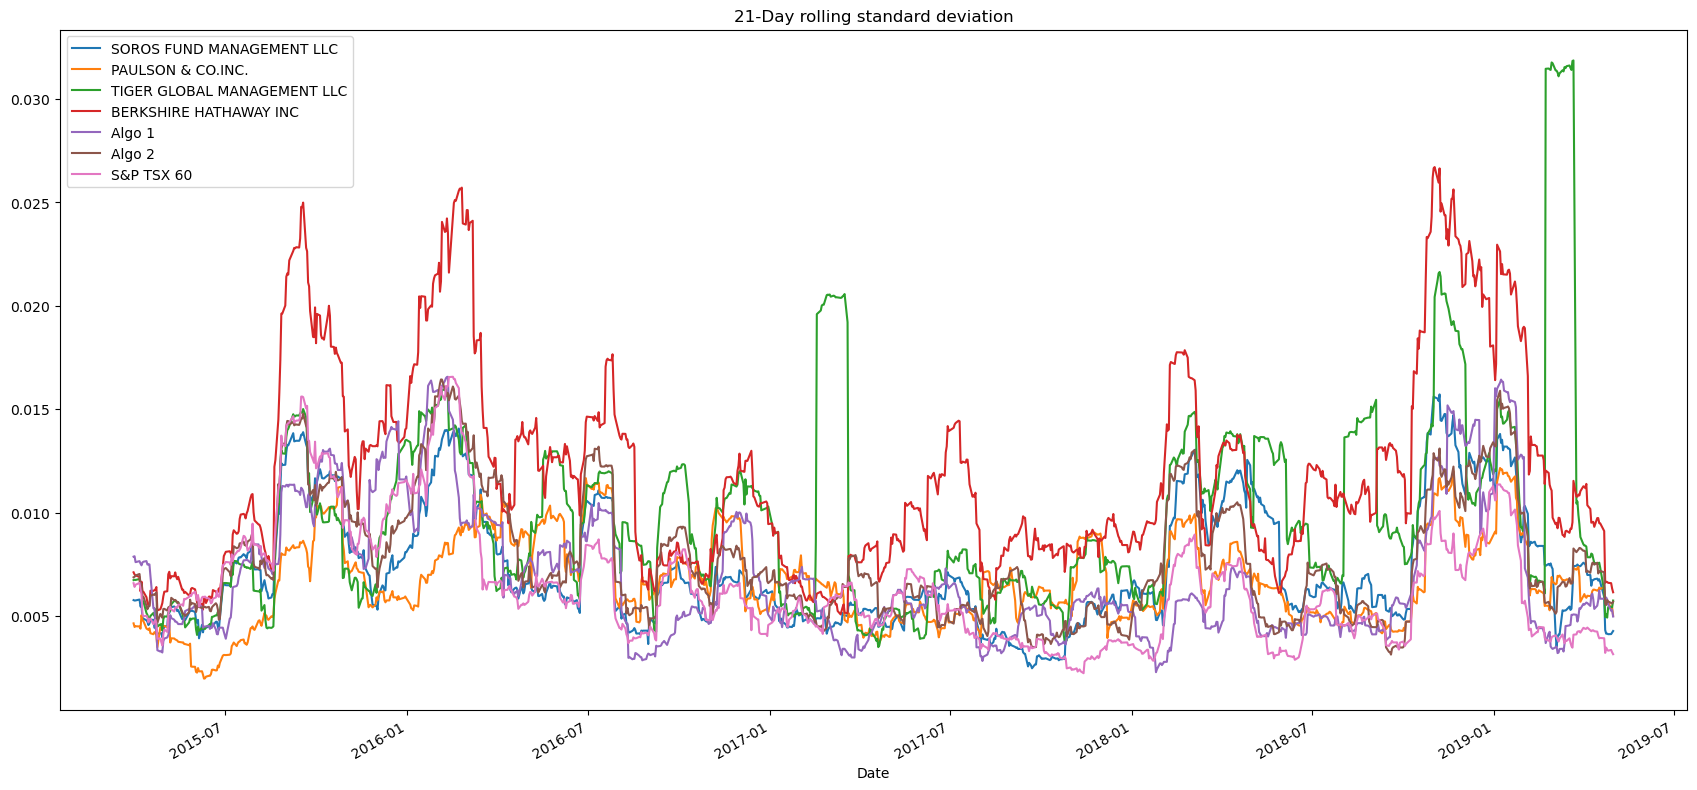

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window=21).std()

rolling_std

# Plot the rolling standard deviation
rolling_std.plot(figsize = (21,10), title='21-Day rolling standard deviation')

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
portfolio_corr = daily_returns.corr()
# Display de correlation matrix
portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [28]:
sp500_rolling_var = daily_returns['S&P TSX 60'].rolling(window=60).var() # Calculate variance of S&P TSX

# Using Functionns to Calculate Rolling Beta of Selected Portfolio

def calculate_rolling_beta():
    rolling_beta = pd.DataFrame()
    for portfolio in daily_returns:
        portfolio_rolling_cov = daily_returns[portfolio].rolling(window=60).cov(daily_returns['S&P TSX 60']) # Calculate covariance of a single portfolio
        portfolio_rolling_beta = portfolio_rolling_cov / sp500_rolling_var                                                 # Computing beta
        rolling_beta[portfolio] = portfolio_rolling_beta
    
    return rolling_beta.dropna()

portfolios_rolling_beta = calculate_rolling_beta() #=(18,6), title=({portfolios_list[4]} 

portfolios_rolling_beta

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-05-28,0.608617,0.376698,0.594797,0.719495,0.295259,0.674906,1.0
2015-05-29,0.618403,0.360092,0.619060,0.720473,0.296934,0.699902,1.0
2015-06-01,0.623193,0.361515,0.613403,0.730892,0.265243,0.703654,1.0
2015-06-02,0.622863,0.358469,0.609553,0.725961,0.273448,0.701447,1.0
2015-06-03,0.611847,0.351232,0.592145,0.688642,0.244655,0.684370,1.0
...,...,...,...,...,...,...,...
2019-04-25,0.913204,0.421500,0.798315,1.243097,0.143726,1.014041,1.0
2019-04-26,0.918302,0.429171,0.814015,1.245349,0.145294,1.014918,1.0
2019-04-29,0.844689,0.405153,0.739528,1.207654,0.141913,0.991566,1.0


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [29]:
# Use `ewm` to calculate the rolling window

portfolio_std_ewm = daily_returns.ewm(com=21).std()
portfolio_std_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002673,0.004953,0.002487,0.007001,0.004166,0.002658,0.004934
2015-03-06,0.005385,0.004610,0.004696,0.009429,0.003412,0.007217,0.005222
2015-03-09,0.004655,0.004462,0.005541,0.008074,0.002984,0.006320,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006006,0.005867,0.013165,0.009387,0.005845,0.006950,0.004176
2019-04-26,0.006037,0.006049,0.013156,0.009345,0.005736,0.006854,0.004088
2019-04-29,0.005899,0.005930,0.012924,0.009150,0.005691,0.006708,0.004014


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
portfolio_sharpe = (daily_returns.mean() * 252)/((daily_returns.std())*np.sqrt(252))

portfolio_sharpe

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

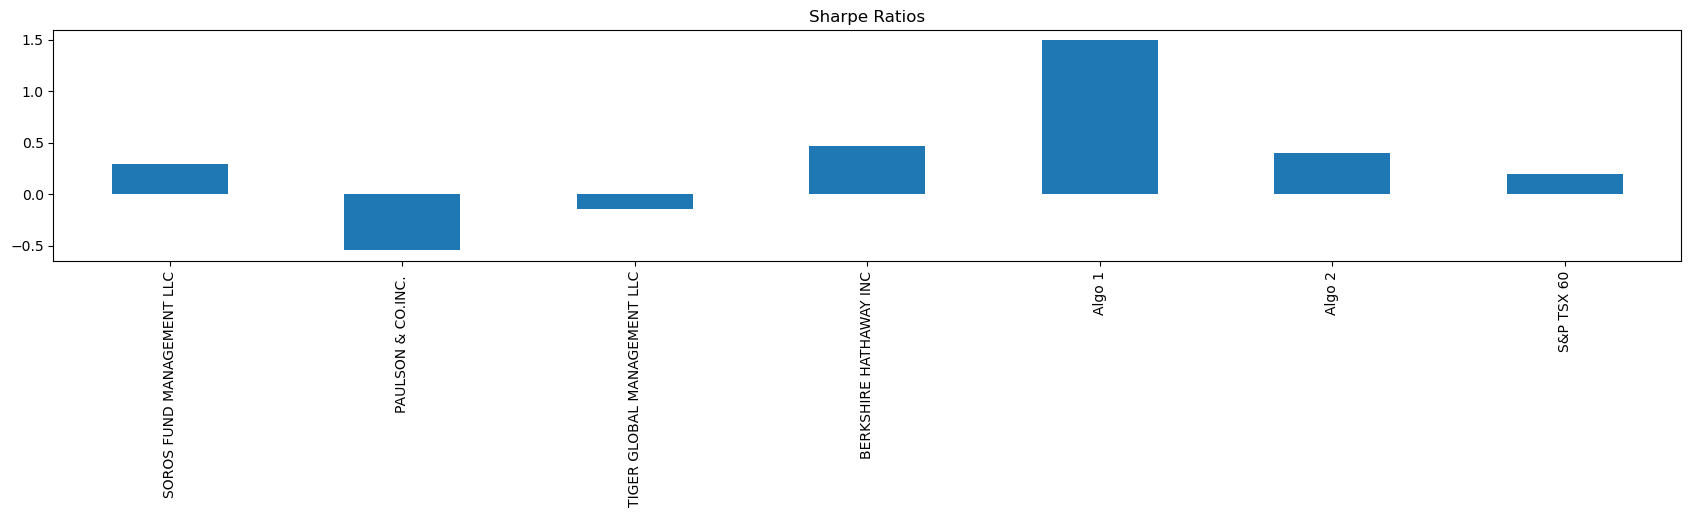

In [31]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe.plot(kind='bar', figsize=(21,3), title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here! volatile

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
#used stocks for analysis are AMZN, TSLA META from Google finance to generate stock price from 2018 2019
stocks_list = ['AMZN','TSLA','META']

def daily_returns():
    #dfs = []
    #for stock in stocks_list:
        daily_returns = pd.read_csv("C:\\Users\\sobii\\Fintech\\Assignment-4\\Module-4-Assignment\\List of Stocks Amzn Meta and TSla.csv")
        return daily_returns
print("Our daily_returns..",daily_returns())

Our daily_returns..     Symbol              Date  Close
0     AMZN    1/5/2018 16:00  61.46
1     AMZN    1/8/2018 16:00  62.34
2     AMZN    1/9/2018 16:00  62.64
3     AMZN   1/10/2018 16:00  62.72
4     AMZN   1/11/2018 16:00  63.83
..     ...               ...    ...
748   TSLA  12/28/2018 16:00  22.26
749   TSLA  12/31/2018 16:00  22.19
750   TSLA    1/2/2019 16:00  20.67
751   TSLA    1/3/2019 16:00  20.02
752   TSLA    1/4/2019 16:00  21.18

[753 rows x 3 columns]


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights : Using Functions to allocate equal weights to stocks in portfolio
def equal_weights():
    allocation = []
    for stock in stocks_list:
        weight = 1 / len(stocks_list)
        allocation.append(weight)
    return allocation    

weights = equal_weights()

weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [64]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_daily_returns = pd.concat([daily_returns, daily_returns], axis = 'columns', join ='outer')

In [66]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna(inplace=True)

daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized `std`
combined_annual_std = (daily_returns.std())*(np.sqrt(252))

combined_annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

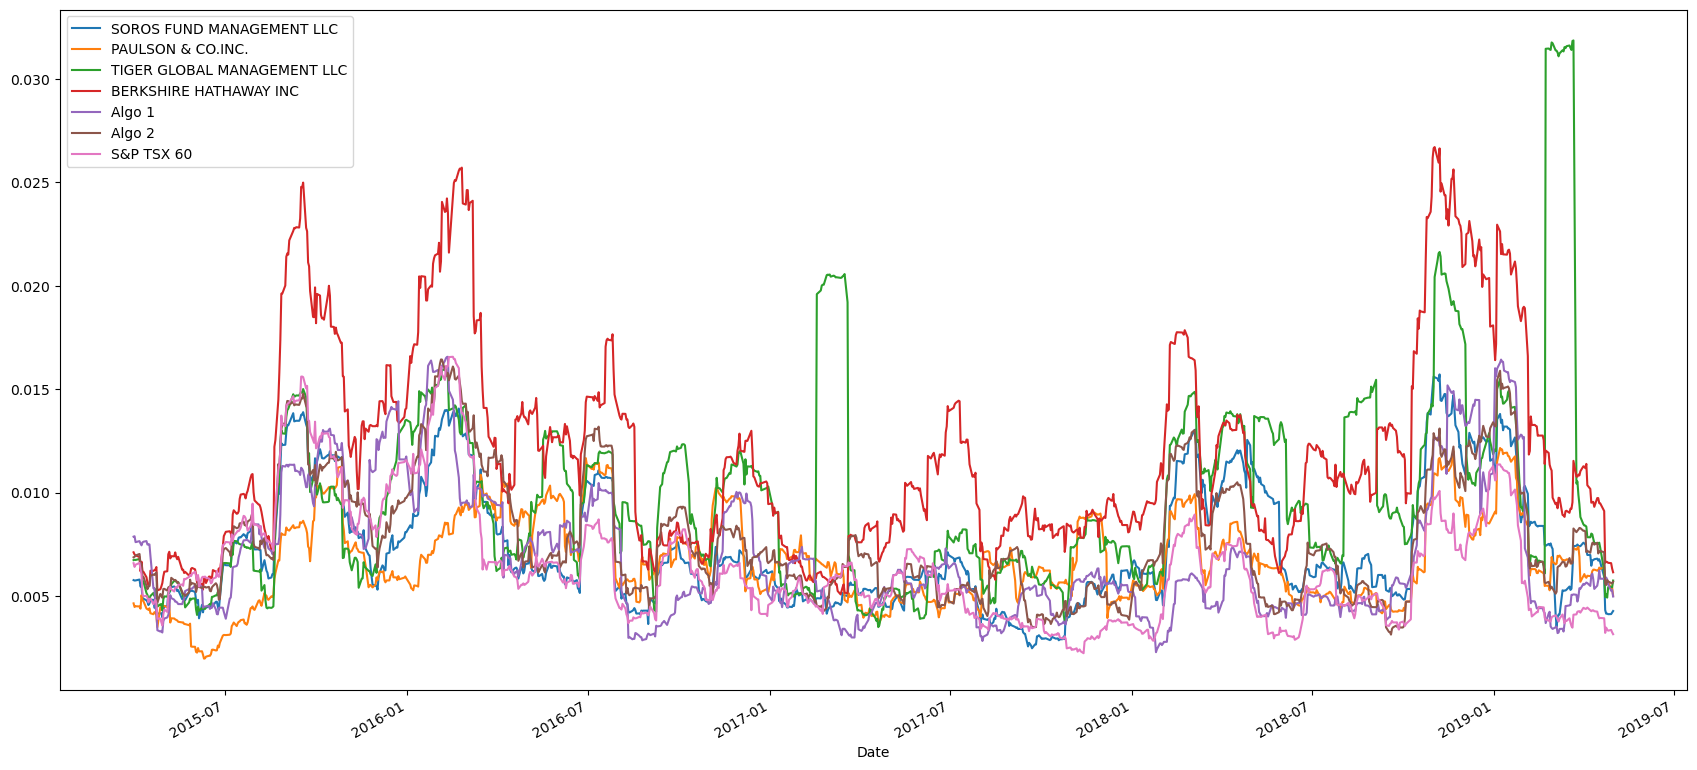

In [74]:
# Calculate rolling standard deviation
combined_rolling_std = daily_returns.rolling(window = 21).std()
# Plot rolling standard deviation
combined_rolling_std.plot(figsize=(21,10))

### Calculate and plot the correlation

In [77]:
# Calculate and plot the correlation
combined_portfolios_corr = daily_returns.corr()

combined_portfolios_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta I would need some recap on this subject

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [81]:
# Calculate Annualized Sharpe Ratios
new_combined_portfolios_sharpe = round((daily_returns.mean() * 252) / (new_combined_annual_std),1)

new_combined_portfolios_sharpe

Algo 1                         1.5
Algo 1                         1.5
Algo 2                         0.4
Algo 2                         0.4
BERKSHIRE HATHAWAY INC         0.5
BERKSHIRE HATHAWAY INC         0.5
PAULSON & CO.INC.             -0.5
PAULSON & CO.INC.             -0.5
S&P TSX 60                     0.2
S&P TSX 60                     0.2
SOROS FUND MANAGEMENT LLC      0.3
SOROS FUND MANAGEMENT LLC      0.3
TIGER GLOBAL MANAGEMENT LLC   -0.1
TIGER GLOBAL MANAGEMENT LLC   -0.1
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

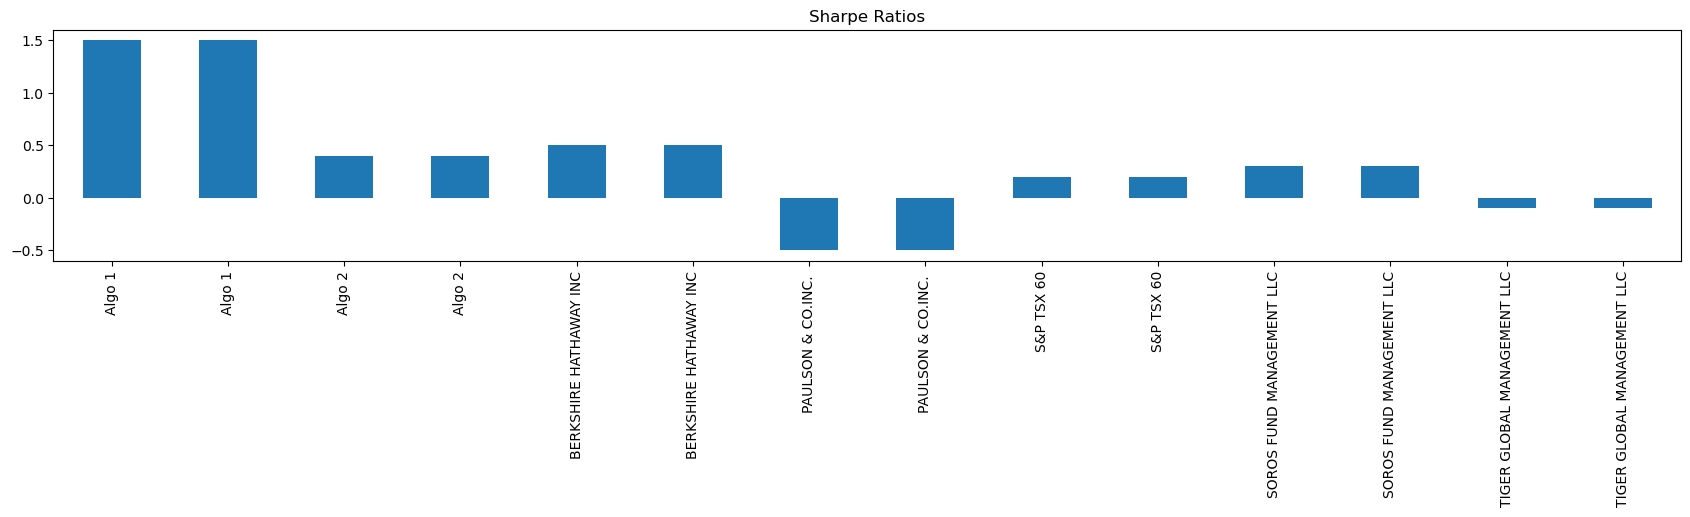

In [82]:
# Visualize the sharpe ratios as a bar plot
new_combined_portfolios_sharpe.plot(kind = 'bar', figsize = (21,3), title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
Analysed based on 3 stocks AMZN, TSLA META from Google finance to generate stock price from 2018 to 2019